# Analysing Adultdataset with pandas

In this notebook, we will explore the Adult Income dataset (taken from UCI- http://archive.ics.uci.edu/ml/datasets/Adult) 
This dataset  The dataset has 32,561 observation and 14 attributes/features. 
This data is fairly old, it was extracted from the 1994 census bureau database. It is not a good dataset to make income prediction for current time. However, this dataset can be used for understaning analysis process using pandas.
We are not doing any prediction but using the data to explore more and get insight into the datasets. During the analysis process we will come across different issuses related to ethics, data etc.   


###  In this notebook we will: 

1. Prepare the data for analysis
    - Examine the dataset, dropping columns, dropping rows, use proper       data type, find an incorrect data type.
2. Explore the relationship between salary and other features 
    -  Genders, race, education  have impact on  salary? 
3. Visual exploratory data analysis
    - Use seaborn and matplot lib to visual analyse the datasets

In [84]:
# Import libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Loading datasets and set column name 
# and specify the “na_values” to load values of ‘?‘ as missing, marked with a NaN value.
data= pd.read_csv("adult.csv", names= ['age', 'workclass', 'fnlwgt', 'education', 'educational_num','marital_status', 'occupation', 'relationship', 'race', 'gender','capital_gain', 'capital_loss', 'hours_per_week', 'native_country','income'],sep=',\s', na_values=["?"])


/Users/pragyal/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


### Dataset features
    age: Age of the person
    workclass: Class of work
    fnlwgt: Final weight of how much of the population it represents
    education: Education level
    education_num: education level
    marital_status:Marital status  of the person
    occupation: Occupation  of the person
    relationship: Type of relationship
    race:Race of the person
    sex:Sex of the person
    capital_gain:Capital gains obtained
    capital_loss:Capital loss
    hours_per_week:Average number of hour working per week
    native_country: Country of origin
    salary: Income level 

In [42]:
#Examine first 5 rows from the dataset
print (data.head())

# checking no. of missing values
print (data.isnull().sum())

# checking the shape of datasets
print (data.shape)

   age         workclass  fnlwgt  education  educational_num  \
0   39         State-gov   77516  Bachelors               13   
1   50  Self-emp-not-inc   83311  Bachelors               13   
2   38           Private  215646    HS-grad                9   
3   53           Private  234721       11th                7   
4   28           Private  338409  Bachelors               13   

       marital_status         occupation   relationship   race  gender  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0 

In [43]:
# Handling missing data by dropping rows
data.dropna(subset=["workclass", "occupation", "native_country"], inplace=True)

# checking missing value to make sure we have dealt with all of them
print(data.isnull().sum())

# Checking data shape after dropping rows
print(data.shape)

age                0
workclass          0
fnlwgt             0
education          0
educational_num    0
marital_status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64
(30162, 15)


In [44]:
# Exploring the relationship between race and salary

# Comparing salary by race 
print(data.race.value_counts())

# Count as proportions
print(data.race.value_counts(normalize=True))


White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: race, dtype: int64
White                 0.859790
Black                 0.093396
Asian-Pac-Islander    0.029673
Amer-Indian-Eskimo    0.009482
Other                 0.007659
Name: race, dtype: float64


In [45]:
# Creating a dataframe for Less than <=50K 

LessThan50K= data[data.income=="<=50K"]
MoreThan50k= data[data.income==">50K"]

In [46]:
# Computing the race by salary (as proportions)
print(LessThan50K.race.value_counts(normalize=True))
print (MoreThan50k.race.value_counts(normalize=True))

White                 0.842853
Black                 0.108193
Asian-Pac-Islander    0.028560
Amer-Indian-Eskimo    0.011124
Other                 0.009270
Name: race, dtype: float64
White                 0.910895
Black                 0.048748
Asian-Pac-Islander    0.033031
Amer-Indian-Eskimo    0.004529
Other                 0.002797
Name: race, dtype: float64


In [47]:
# Now lets compare salary with gender 

print (LessThan50K.gender.value_counts(normalize= True))
print (MoreThan50k.gender.value_counts(normalize=True))

Male      0.617286
Female    0.382714
Name: gender, dtype: float64
Male      0.851891
Female    0.148109
Name: gender, dtype: float64


In [48]:
print(LessThan50K.occupation.value_counts(normalize=True))
print (MoreThan50k.occupation.value_counts(normalize=True))

Adm-clerical         0.142271
Craft-repair         0.137812
Other-service        0.135958
Sales                0.115388
Prof-specialty       0.098305
Exec-managerial      0.090712
Machine-op-inspct    0.075969
Handlers-cleaners    0.055928
Transport-moving     0.055310
Farming-fishing      0.038580
Tech-support         0.027986
Protective-serv      0.019158
Priv-house-serv      0.006268
Armed-Forces         0.000353
Name: occupation, dtype: float64
Exec-managerial      0.257991
Prof-specialty       0.241209
Sales                0.129196
Craft-repair         0.120938
Adm-clerical         0.066329
Transport-moving     0.042488
Tech-support         0.037027
Machine-op-inspct    0.032632
Protective-serv      0.027970
Other-service        0.017581
Farming-fishing      0.015317
Handlers-cleaners    0.011055
Armed-Forces         0.000133
Priv-house-serv      0.000133
Name: occupation, dtype: float64


In [49]:
# Creating a dataframe for gender

Female= data[data.gender=="Female"]
Male= data[data.gender=="Male"]

In [50]:
# Computing the occupation by gender (as proportions) 
print(Female.occupation.value_counts(normalize= True))
print(Male.occupation.value_counts(normalize=True))       

Adm-clerical         0.256798
Other-service        0.179718
Prof-specialty       0.152423
Sales                0.127581
Exec-managerial      0.116847
Machine-op-inspct    0.055510
Tech-support         0.034860
Craft-repair         0.022081
Handlers-cleaners    0.016765
Priv-house-serv      0.013801
Transport-moving     0.009201
Protective-serv      0.007769
Farming-fishing      0.006645
Name: occupation, dtype: float64
Craft-repair         0.187144
Exec-managerial      0.139794
Prof-specialty       0.124975
Sales                0.114622
Transport-moving     0.072718
Other-service        0.071344
Machine-op-inspct    0.069823
Adm-clerical         0.059323
Handlers-cleaners    0.058194
Farming-fishing      0.045339
Tech-support         0.028018
Protective-serv      0.027870
Armed-Forces         0.000442
Priv-house-serv      0.000393
Name: occupation, dtype: float64


In [51]:
# checking with marital-status  and gender

print(Female.marital_status.value_counts(normalize=True))

Never-married            0.440810
Divorced                 0.258536
Married-civ-spouse       0.151298
Widowed                  0.070129
Separated                0.058679
Married-spouse-absent    0.019321
Married-AF-spouse        0.001227
Name: marital_status, dtype: float64


In [52]:
# Mapping income to 0 and 1
data["income"]= data["income"].map({'<=50K': 0, '>50K': 1})

In [53]:
data.tail()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [54]:
# Adding 3 factors for analysis
# calculate the income for each combination of gender, occupation and race

print(data.groupby(["gender","occupation", "race"]). income.mean())

gender  occupation        race              
Female  Adm-clerical      Amer-Indian-Eskimo    0.045455
                          Asian-Pac-Islander    0.085366
                          Black                 0.041783
                          Other                 0.055556
                          White                 0.091088
                                                  ...   
Male    Transport-moving  Amer-Indian-Eskimo    0.125000
                          Asian-Pac-Islander    0.222222
                          Black                 0.123288
                          Other                 0.076923
                          White                 0.221702
Name: income, Length: 124, dtype: float64


In [55]:
# Reversing the order to group by race before occupation and gender
print(data.groupby(["race","occupation", "gender"]). income.mean())

race                occupation        gender
Amer-Indian-Eskimo  Adm-clerical      Female    0.045455
                                      Male      0.222222
                    Armed-Forces      Male      0.000000
                    Craft-repair      Female    0.000000
                                      Male      0.142857
                                                  ...   
White               Sales             Male      0.390837
                    Tech-support      Female    0.147887
                                      Male      0.414062
                    Transport-moving  Female    0.136364
                                      Male      0.221702
Name: income, Length: 124, dtype: float64


In [56]:
# Create a frequency table of race and occupation
print(pd.crosstab(data.occupation, data.race))

race               Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White
occupation                                                                    
Adm-clerical                       31                 134    480     23   3053
Armed-Forces                        1                   0      1      0      7
Craft-repair                       44                  83    234     25   3644
Exec-managerial                    30                 121    235     11   3595
Farming-fishing                    10                  16     42     11    910
Handlers-cleaners                  22                  22    170     11   1125
Machine-op-inspct                  19                  50    269     39   1589
Other-service                      33                 117    553     37   2472
Priv-house-serv                     0                   4     27      3    109
Prof-specialty                     33                 176    226     28   3575
Protective-serv                     8               

In [57]:
print(pd.crosstab(data.workclass, data.race))

race              Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White
workclass                                                                    
Federal-gov                       19                  40    168      6    710
Local-gov                         36                  39    282      6   1704
Private                          190                 655   2100    204  19137
Self-emp-inc                       2                  39     23      4   1006
Self-emp-not-inc                  24                  67     87      7   2314
State-gov                         15                  54    156      4   1050
Without-pay                        0                   1      1      0     12


In [58]:
print(pd.crosstab(data.occupation, data.age.mean()))

col_0              38.437902
occupation                  
Adm-clerical            3721
Armed-Forces               9
Craft-repair            4030
Exec-managerial         3992
Farming-fishing          989
Handlers-cleaners       1350
Machine-op-inspct       1966
Other-service           3212
Priv-house-serv          143
Prof-specialty          4038
Protective-serv          644
Sales                   3584
Tech-support             912
Transport-moving        1572


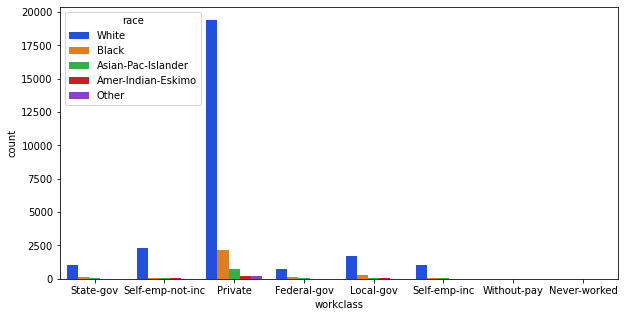

In [63]:
# Exploratory data analysis using visualisation- using seaborn 
# Distribution of race vs workclass

fig = plt.figure(figsize=(10,5))
sns.countplot(data['workclass'],hue =data['race'],palette= 'bright'); 

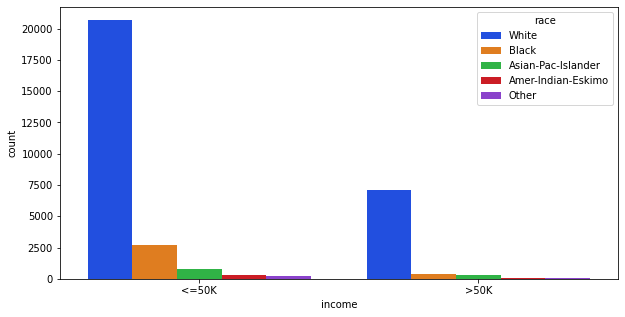

In [64]:
# Race vs income
fig = plt.figure(figsize=(10,5))
sns.countplot(data['income'],hue =data['race'],palette= 'bright'); 

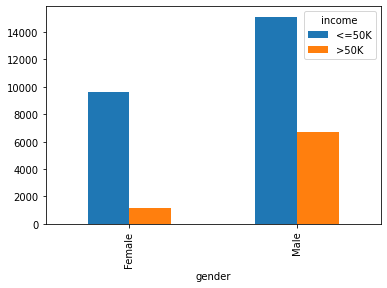

In [100]:
#Exploratory data analysis using visualisation- using frequency table & matplot lib 
gender = round(pd.crosstab(data.gender, data.income))
gender.plot(kind="bar")
plt.show()

<AxesSubplot:ylabel='education'>

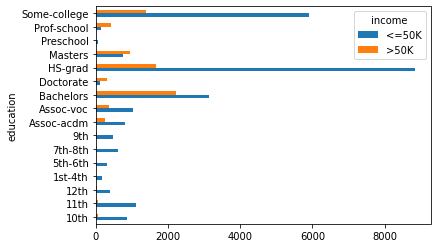

In [99]:
education = (pd.crosstab(data.education, data.income))
education.plot(kind="barh")